In [20]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt

import FinanceDataReader as fdr
%matplotlib inline

FinanceDataReader install : pip install finance-datareader

In [2]:
df = pd.read_csv("../jimin/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
stock_data = fdr.DataReader('NFLX','2008','2022')
stock_data

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,3.76,3.79,3.89,3.66,12530000.0,-0.0105
2008-01-03,3.72,3.99,4.04,3.66,21340000.0,-0.0106
2008-01-04,3.52,3.72,3.80,3.48,17210000.0,-0.0538
2008-01-07,3.55,3.53,3.56,3.39,12690000.0,0.0085
2008-01-08,3.33,3.54,3.55,3.25,14490000.0,-0.0620
...,...,...,...,...,...,...
2021-12-27,613.12,615.00,615.00,609.25,1860000.0,-0.0016
2021-12-28,610.71,614.95,618.41,609.69,1850000.0,-0.0039
2021-12-29,610.54,610.71,613.98,604.68,1280000.0,-0.0003


In [4]:
start_date = datetime.date(2008,1,1)
end_date = datetime.date(2021,12,31)

print(start_date,end_date)

2008-01-01 2021-12-31


In [9]:
dummy_size = (end_date-start_date)/datetime.timedelta(days=1)+1

In [10]:
dummy_array = pd.DataFrame(np.zeros(int(dummy_size)).reshape(int(dummy_size),-1))
dummy_array.columns = ['Date']
dummy_array['Date'] = [start_date+datetime.timedelta(days = x) for x in range(len(dummy_array))]

In [16]:
pd.to_datetime(dummy_array['Date'])

0      2008-01-01
1      2008-01-02
2      2008-01-03
3      2008-01-04
4      2008-01-05
          ...    
5109   2021-12-27
5110   2021-12-28
5111   2021-12-29
5112   2021-12-30
5113   2021-12-31
Name: Date, Length: 5114, dtype: datetime64[ns]

In [8]:
stock_data.reset_index(inplace=True)
stock_data

,Date,Close,Open,High,Low,Volume,Change
0,2008-01-02,3.76,3.79,3.89,3.66,12530000.0,-0.0105
1,2008-01-03,3.72,3.99,4.04,3.66,21340000.0,-0.0106
2,2008-01-04,3.52,3.72,3.80,3.48,17210000.0,-0.0538
3,2008-01-07,3.55,3.53,3.56,3.39,12690000.0,0.0085
4,2008-01-08,3.33,3.54,3.55,3.25,14490000.0,-0.0620
...,...,...,...,...,...,...,...
3522,2021-12-27,613.12,615.00,615.00,609.25,1860000.0,-0.0016
3523,2021-12-28,610.71,614.95,618.41,609.69,1850000.0,-0.0039
3524,2021-12-29,610.54,610.71,613.98,604.68,1280000.0,-0.0003
3525,2021-12-30,612.09,612.99,620.61,611.24,1610000.0,0.0025


In [13]:
stock_data['Date']

0      2008-01-02
1      2008-01-03
2      2008-01-04
3      2008-01-07
4      2008-01-08
          ...    
3522   2021-12-27
3523   2021-12-28
3524   2021-12-29
3525   2021-12-30
3526   2021-12-31
Name: Date, Length: 3527, dtype: datetime64[ns]

In [17]:
df2=pd.merge(pd.to_datetime(dummy_array['Date']),stock_data,how = 'left')

In [18]:
df2

,Date,Close,Open,High,Low,Volume,Change
0,2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-01-02,3.76,3.79,3.89,3.66,12530000.0,-0.0105
2,2008-01-03,3.72,3.99,4.04,3.66,21340000.0,-0.0106
3,2008-01-04,3.52,3.72,3.80,3.48,17210000.0,-0.0538
4,2008-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5109,2021-12-27,613.12,615.00,615.00,609.25,1860000.0,-0.0016
5110,2021-12-28,610.71,614.95,618.41,609.69,1850000.0,-0.0039
5111,2021-12-29,610.54,610.71,613.98,604.68,1280000.0,-0.0003
5112,2021-12-30,612.09,612.99,620.61,611.24,1610000.0,0.0025


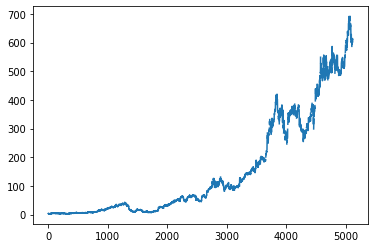

In [22]:
plt.plot(df2['Close'])